In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
# import the dataset
df = pd.read_csv('autos_mpg.csv')

# Analysing the dataset...

In [3]:
# verifying null values
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
car_name        False
dtype: bool

In [4]:
# lets analyse the data types
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [5]:
# lets verify why horsepower is shown as an object
df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
# whe can verify that there is a '?' in the dataset, lets remove these entries
df = df[df.horsepower != '?']

In [7]:
# converting the column horsepower to the correct type after removing the '?' symbol
df.horsepower = df.loc[:,'horsepower'].astype('float')

In [8]:
# Lets analyse the dataset
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
# function to reescale
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [10]:
# rescaling all variables
data_scale = df.copy()
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

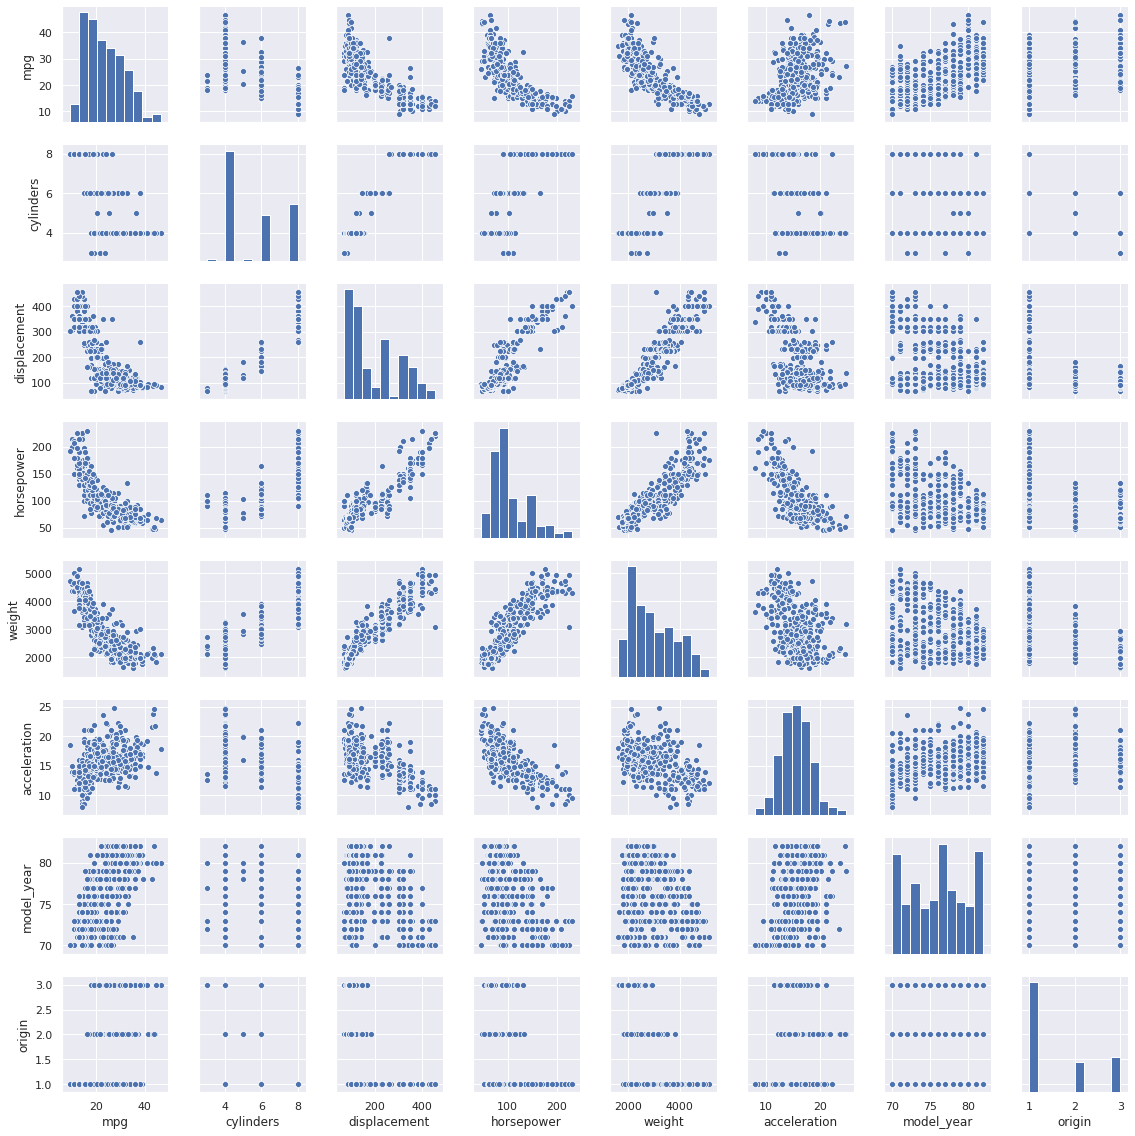

In [11]:
# veryfing the relation between the variables
sns.set()
sns.pairplot(df, height = 2.0)
plt.show()

## Lets apply a polynomial regression on the variable horsepower, since it doesn't appear to be linear and see the results...

In [12]:
X = df.loc[:, 'horsepower'].values.reshape(-1,1) #matrix
y = df.loc[:, 'mpg'] #vector

In [13]:
from sklearn.model_selection import train_test_split

# spliting training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33)

### In terms of comparison, lets create a linear model too...

In [14]:
# Fitting multiple linear regression to the training set...
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_linear = regressor.predict(X_test)

## Creating a polynomial model...

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

In [16]:
regressor2 = LinearRegression()
regressor2.fit(X_poly, y_train)
y_pred_poly = regressor2.predict(poly_reg.fit_transform(X_test))

## Comparing the models...

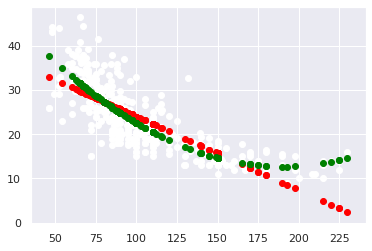

In [17]:
# plotting the real values
plt.scatter(X, y, color='white')
plt.scatter(X_test, y_pred_linear, color='red')
plt.scatter(X_test, y_pred_poly, color='green')
plt.show()

# Conclusion
## Visualizing the plot it is clear that applying a polynomial regression, the predicted points are better fitted mainly in the extremes.